In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_SAMPLE = '/Users/macbook/Downloads/regression-tutors-expected-math-exam-results/sample_submission.csv'
PATH_TO_TRAIN = '/Users/macbook/Downloads/regression-tutors-expected-math-exam-results/train.csv'
PATH_TO_TEST = '/Users/macbook/Downloads/regression-tutors-expected-math-exam-results/test.csv'

In [3]:
df_sample_submition = pd.read_csv(PATH_TO_SAMPLE)
df_train = pd.read_csv(PATH_TO_TRAIN)
df_test = pd.read_csv(PATH_TO_TEST)

In [4]:
df_sample_submition.head()

,Id,mean_exam_points
0,10000,50.0
1,10001,50.0
2,10002,50.0
3,10003,50.0
4,10004,50.0


In [5]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [6]:
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_sample_submition.shape

(10000, 2)

In [8]:
df_train.shape

(10000, 12)

In [9]:
df_test.shape

(10000, 11)

In [10]:
X, y = df_train.loc[:, 'age':'history'], df_train.loc[:, 'mean_exam_points']

In [11]:
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y.head()

0    61
1    76
2    53
3    54
4    57
Name: mean_exam_points, dtype: int64

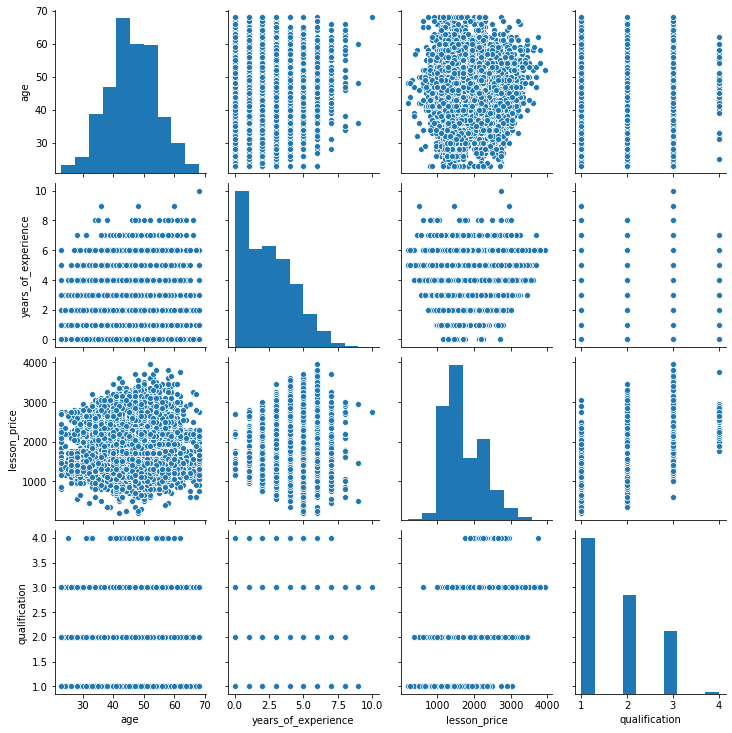

In [13]:
sns.pairplot(X.loc[:, 'age':'qualification'])

In [14]:
X.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
def stds(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

In [16]:
def norm(x):
    max_value = x.max()
    min_value = x.min()
    x = (x - min_value) / (max_value - min_value)
    return x

In [17]:
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def linear_regression(X, y, min_w_dist=1e-5, max_iterations=1e3, eta=1e-2):
    n = X.shape[1]
    w = np.zeros(n)
    w_dist = np.inf
    iters = 0
    w_list = []
    errors = []
    
    while w_dist > min_w_dist and iters < max_iterations:
        y_pred = np.dot(X, w)
        dQ = 2/n * np.dot(X.T, y_pred - y)
        new_w = w - eta * dQ
        w_dist = np.linalg.norm(new_w - w, ord=2)
        error = mse(y, y_pred)
        print(f'Веса: {new_w}, Ошибка: {error}')
        
        w_list.append(new_w.copy())
        errors.append(error)
        
        iters += 1
        w = new_w
        
    return w_list, errors

In [19]:
age = X.loc[:, 'age']
lesson_price = X.loc[:, 'lesson_price']
years_of_experience = X.loc[:, 'years_of_experience']
qualification = X.loc[:, 'qualification']

In [20]:
X.loc[:, 'lesson_price'] = norm(lesson_price)
X.loc[:, 'age'] = norm(age)
X.loc[:, 'years_of_experience'] = norm(years_of_experience)
X.loc[:, 'qualification'] = norm(qualification)

In [21]:
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,0.377778,0.0,0.320000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
1,0.555556,0.4,0.706667,0.666667,1.0,0.0,0.0,0.0,0.0,0.0
2,0.355556,0.0,0.266667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.511111,0.5,0.320000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.444444,0.1,0.346667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.508400,0.198680,0.399761,0.239833,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400
std,0.178754,0.177221,0.139970,0.264088,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377778,0.000000,0.293333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.511111,0.200000,0.346667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.622222,0.300000,0.520000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
X = X.loc[:, 'age': 'qualification']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
w_list, errors = linear_regression(X_train, y_train, min_w_dist=1e-4, max_iterations=1e4, eta=1e-4)
w_list[-1], errors[-1]

Веса: [11.25439889  4.613       9.401494    6.30753333], Ошибка: 4269.579142857143
Веса: [20.27721704  8.29719812 16.99795363 11.34954887], Ошибка: 2847.0743406224515
Веса: [27.50789258 11.23562485 23.14464341 15.37532966], Ошибка: 1929.443970235609
Веса: [33.29933491 13.5752692  28.1268737  18.58507205], Ошибка: 1337.4365882262891
Веса: [37.93496298 15.4341756  32.17377524 21.13955136], Ошибка: 955.4429503422557
Веса: [41.64238855 16.90714334 35.46936144 23.16788418], Ошибка: 708.900208874717
Веса: [44.60440507 18.07030377 38.16141235 24.7737623 ], Ошибка: 549.7186218945112
Веса: [46.96781283 18.98479617 40.36860936 26.04045905], Ошибка: 446.88242692956607
Веса: [48.85050627 19.69971983 42.18626492 27.03484992], Ошибка: 380.3878212694711
Веса: [50.34716582 20.25450487 43.69092414 27.81064141], Ошибка: 337.33322806758366
Веса: [51.53382889 20.68081615 44.94406023 28.41096417], Ошибка: 309.39769134404014
Веса: [52.47156088 21.00408235 45.99504227 28.87045545], Ошибка: 291.2145525761974


Веса: [50.28926846 16.03094734 66.84139461 22.3529046 ], Ошибка: 228.42348572561778
Веса: [50.22602837 15.97495934 67.00801343 22.26804031], Ошибка: 228.18159834488165
Веса: [50.1629688  15.91930494 67.1740343  22.18346499], Ошибка: 227.94148050618873
Веса: [50.1000897  15.86398161 67.33945934 22.09917761], Ошибка: 227.70311881204356
Веса: [50.03739097 15.80898689 67.50429064 22.01517712], Ошибка: 227.4664999752657
Веса: [49.97487253 15.75431829 67.6685303  21.93146251], Ошибка: 227.23161081790207
Веса: [49.9125343  15.69997336 67.83218042 21.84803277], Ошибка: 226.9984382701666
Веса: [49.85037615 15.64594969 67.99524308 21.76488688], Ошибка: 226.76696936937967
Веса: [49.78839799 15.59224487 68.15772036 21.68202385], Ошибка: 226.53719125894173
Веса: [49.72659969 15.53885651 68.31961433 21.59944268], Ошибка: 226.30909118729437
Веса: [49.66498112 15.48578226 68.48092706 21.51714238], Ошибка: 226.08265650691092
Веса: [49.60354217 15.43301976 68.6416606  21.43512196], Ошибка: 225.857874673

Веса: [41.56333504  9.61878571 88.95402781 10.92977752], Ошибка: 204.06802288225623
Веса: [41.52787655  9.59696492 89.04117563 10.88410887], Ошибка: 204.0024474429648
Веса: [41.49253896  9.57524452 89.12801025 10.83859972], Ошибка: 203.93734292295179
Веса: [41.4573219   9.55362393 89.2145328  10.79324956], Ошибка: 203.87270592787712
Веса: [41.42222501  9.53210257 89.3007444  10.74805784], Ошибка: 203.80853308811874
Веса: [41.38724791  9.51067988 89.38664618 10.70302405], Ошибка: 203.7448210585769
Веса: [41.35239024  9.48935529 89.47223925 10.65814765], Ошибка: 203.6815665184991
Веса: [41.31765164  9.46812823 89.55752472 10.61342812], Ошибка: 203.61876617129224
Веса: [41.28303173  9.44699815 89.64250369 10.56886493], Ошибка: 203.5564167443496
Веса: [41.24853016  9.42596449 89.72717728 10.52445757], Ошибка: 203.49451498886464
Веса: [41.21414656  9.40502671 89.81154658 10.4802055 ], Ошибка: 203.43305767965578
Веса: [41.17988055  9.38418425 89.89561268 10.43610823], Ошибка: 203.37204161499

Веса: [37.34426143  7.18239499 99.22517519  5.51838039], Ошибка: 197.96574180701452
Веса: [37.32344938  7.17106049 99.2754232   5.49178037], Ошибка: 197.94394427071066
Веса: [37.30271067  7.15977147 99.32549076  5.46527484], Ошибка: 197.9223029857938
Веса: [37.28204506  7.14852773 99.37537852  5.43886346], Ошибка: 197.90081683160903
Веса: [37.26145229  7.13732906 99.42508711  5.41254591], Ошибка: 197.8794846955599
Веса: [37.24093212  7.12617525 99.47461718  5.38632185], Ошибка: 197.8583054730314
Веса: [37.2204843   7.1150661  99.52396938  5.36019097], Ошибка: 197.8372780673486
Веса: [37.20010859  7.10400139 99.57314434  5.33415293], Ошибка: 197.81640138970755
Веса: [37.17980472  7.09298092 99.6221427   5.30820742], Ошибка: 197.79567435912966
Веса: [37.15957247  7.0820045  99.6709651   5.2823541 ], Ошибка: 197.77509590239382
Веса: [37.13941159  7.0710719  99.71961216  5.25659267], Ошибка: 197.7546649539899
Веса: [37.11932183  7.06018295 99.76808453  5.23092279], Ошибка: 197.734380456058

Веса: [ 34.69417861   5.77834215 105.5995949    2.13650794], Ошибка: 195.8263059578255
Веса: [ 34.6827674    5.77244211 105.62695439   2.12196495], Ошибка: 195.81984222445934
Веса: [ 34.67139689   5.76656414 105.65421566   2.10747399], Ошибка: 195.8134248127181
Веса: [ 34.66006695   5.76070815 105.68137906   2.09303485], Ошибка: 195.807053390628
Веса: [ 34.64877743   5.75487406 105.70844493   2.07864736], Ошибка: 195.80072762858578
Веса: [ 34.63752819   5.74906177 105.73541363   2.06431133], Ошибка: 195.79444719935552
Веса: [ 34.62631909   5.74327121 105.76228552   2.05002659], Ошибка: 195.78821177804608
Веса: [ 34.61514999   5.73750227 105.78906093   2.03579294], Ошибка: 195.78202104209385
Веса: [ 34.60402073   5.73175489 105.81574021   2.02161021], Ошибка: 195.77587467124837
Веса: [ 34.59293119   5.72602896 105.84232372   2.00747821], Ошибка: 195.76977234755603
Веса: [ 34.58188123   5.72032442 105.86881178   1.99339677], Ошибка: 195.7637137553411
Веса: [ 34.5708707    5.71464116 105.

Веса: [ 33.7331548    5.28477231 107.90172662   0.91217192], Ошибка: 195.3637229871444
Веса: [ 33.72517715   5.28070069 107.9208215    0.90201185], Ошибка: 195.3605742580274
Веса: [ 33.71722805   5.27664402 107.93984784   0.89188817], Ошибка: 195.35744809335733
Веса: [ 33.70930739   5.27260223 107.95880587   0.88180077], Ошибка: 195.3543443314308
Веса: [ 33.70141507   5.26857527 107.97769584   0.87174951], Ошибка: 195.3512628117002
Веса: [ 33.69355099   5.26456309 107.99651801   0.86173426], Ошибка: 195.34820337477058
Веса: [ 33.68571505   5.26056563 108.0152726    0.8517549 ], Ошибка: 195.3451658623911
Веса: [ 33.67790715   5.25658282 108.03395987   0.84181129], Ошибка: 195.34215011744138
Веса: [ 33.67012719   5.25261463 108.05258006   0.83190331], Ошибка: 195.33915598393097
Веса: [ 33.66237506   5.24866098 108.0711334    0.82203083], Ошибка: 195.33618330698417
Веса: [ 33.65465068   5.24472183 108.08962014   0.81219372], Ошибка: 195.33323193283744
Веса: [ 33.64695393   5.24079713 108.

Веса: [ 3.29642533e+01  4.89392572e+00  1.09741167e+02 -6.68677318e-02], Ошибка: 195.1123893916024
Веса: [ 3.29590291e+01  4.89128001e+00  1.09753659e+02 -7.35183318e-02], Ошибка: 195.1110417636525
Веса: [ 3.29538237e+01  4.88864391e+00  1.09766106e+02 -8.01450806e-02], Ошибка: 195.10970379300997
Веса: [ 3.29486369e+01  4.88601736e+00  1.09778508e+02 -8.67480637e-02], Ошибка: 195.10837541046925
Веса: [ 3.29434688e+01  4.88340035e+00  1.09790866e+02 -9.33273661e-02], Ошибка: 195.10705654732018
Веса: [ 3.29383191e+01  4.88079282e+00  1.09803179e+02 -9.98830727e-02], Ошибка: 195.1057471353443
Веса: [ 3.29331879e+01  4.87819475e+00  1.09815448e+02 -1.06415268e-01], Ошибка: 195.10444710681514
Веса: [ 32.92807509   4.87560611 109.82767339  -0.11292404], Ошибка: 195.1031563944854
Веса: [ 32.92298061   4.87302685 109.83985462  -0.11940946], Ошибка: 195.10187493159827
Веса: [ 32.91790438   4.87045695 109.85199211  -0.12587163], Ошибка: 195.100602651866
Веса: [ 32.91284635   4.86789636 109.86408

Веса: [ 32.53559171   4.6771944  110.76594487  -0.61252752], Ошибка: 195.01794250060996
Веса: [ 32.53190445   4.675333   110.77475805  -0.61722079], Ошибка: 195.0172716929393
Веса: [ 32.52823041   4.67347833 110.7835396   -0.62189723], Ошибка: 195.0166056923696
Веса: [ 32.52456955   4.67163035 110.79228962  -0.62655689], Ошибка: 195.01594446445355
Веса: [ 32.52092182   4.66978904 110.80100823  -0.63119983], Ошибка: 195.0152879749924
Веса: [ 32.51728718   4.66795438 110.80969555  -0.63582611], Ошибка: 195.01463619002737
Веса: [ 32.51366557   4.66612634 110.81835168  -0.6404358 ], Ошибка: 195.0139890758443
Веса: [ 32.51005695   4.6643049  110.82697674  -0.64502895], Ошибка: 195.0133465989746
Веса: [ 32.50646127   4.66249003 110.83557084  -0.64960561], Ошибка: 195.0127087261839
Веса: [ 32.50287849   4.66068172 110.84413409  -0.65416586], Ошибка: 195.0120754244788
Веса: [ 32.49930856   4.65887993 110.8526666   -0.65870974], Ошибка: 195.01144666110494
Веса: [ 32.49575143   4.65708464 110.86

Веса: [ 32.15195139   4.48374088 111.68277969  -1.10081013], Ошибка: 194.9610854649806
Веса: [ 32.14964041   4.48257672 111.68830183  -1.1037513 ], Ошибка: 194.96082210276145
Веса: [ 32.14733772   4.48141675 111.69380414  -1.10668192], Ошибка: 194.96056062783046
Веса: [ 32.1450433    4.48026095 111.69928671  -1.10960202], Ошибка: 194.96030102666583
Веса: [ 32.14275711   4.47910932 111.70474959  -1.11251164], Ошибка: 194.96004328583848
Веса: [ 32.14047912   4.47796182 111.71019287  -1.11541081], Ошибка: 194.9597873920177
Веса: [ 32.1382093    4.47681846 111.7156166   -1.11829959], Ошибка: 194.95953333196667
Веса: [ 32.13594763   4.47567921 111.72102087  -1.12117799], Ошибка: 194.9592810925459
Веса: [ 32.13369408   4.47454406 111.72640574  -1.12404607], Ошибка: 194.9590306607081
Веса: [ 32.13144861   4.47341299 111.73177128  -1.12690385], Ошибка: 194.95878202349755
Веса: [ 32.1292112    4.47228599 111.73711756  -1.12975138], Ошибка: 194.95853516805647
Веса: [ 32.12698182   4.47116305 111

Веса: [ 31.9308327    4.37240213 112.21111714  -1.38222013], Ошибка: 194.94017720329296
Веса: [ 31.92931522   4.37163835 112.21474279  -1.38415133], Ошибка: 194.94006367255216
Веса: [ 31.92780319   4.37087732 112.21835543  -1.3860756 ], Ошибка: 194.93995095538725
Веса: [ 31.92629658   4.37011903 112.22195509  -1.38799296], Ошибка: 194.93983904596874
Веса: [ 31.92479538   4.36936346 112.22554184  -1.38990344], Ошибка: 194.93972793850932
Веса: [ 31.92329957   4.36861061 112.22911571  -1.39180707], Ошибка: 194.93961762726093
Веса: [ 31.92180912   4.36786046 112.23267676  -1.39370386], Ошибка: 194.93950810651896
Веса: [ 31.92032403   4.36711301 112.23622502  -1.39559385], Ошибка: 194.93939937061447
Веса: [ 31.91884426   4.36636824 112.23976054  -1.39747705], Ошибка: 194.93929141392894
Веса: [ 31.91736981   4.36562615 112.24328337  -1.39935349], Ошибка: 194.93918423087547
Веса: [ 31.91590065   4.36488673 112.24679356  -1.4012232 ], Ошибка: 194.93907781591034
Веса: [ 31.91443676   4.36414997

Веса: [ 31.78564182   4.29934069 112.55800608  -1.56699343], Ошибка: 194.93116402551672
Веса: [ 31.78464544   4.2988394  112.56038656  -1.56826144], Ошибка: 194.9311150844424
Веса: [ 31.78365264   4.29833991 112.5627585   -1.56952489], Ошибка: 194.93106649408796
Веса: [ 31.7826634    4.29784222 112.56512192  -1.57078381], Ошибка: 194.93101825193767
Веса: [ 31.78167771   4.29734631 112.56747687  -1.57203821], Ошибка: 194.93097035549704
Веса: [ 31.78069555   4.29685218 112.56982335  -1.5732881 ], Ошибка: 194.9309228022894
Веса: [ 31.77971693   4.29635983 112.57216142  -1.57453351], Ошибка: 194.9308755898541
Веса: [ 31.77874181   4.29586924 112.57449109  -1.57577445], Ошибка: 194.93082871575
Веса: [ 31.7777702    4.29538042 112.5768124   -1.57701094], Ошибка: 194.9307821775518
Веса: [ 31.77680207   4.29489336 112.57912538  -1.57824298], Ошибка: 194.93073597285345
Веса: [ 31.77583742   4.29440804 112.58143006  -1.57947061], Ошибка: 194.93069009926344
Веса: [ 31.77487623   4.29392447 112.58

Веса: [ 31.6870629    4.24974975 112.79352102  -1.69244531], Ошибка: 194.92717461861432
Веса: [ 31.68642035   4.24942654 112.79505612  -1.69326301], Ошибка: 194.92715426617823
Веса: [ 31.6857801    4.24910449 112.79658571  -1.69407779], Ошибка: 194.9271340595895
Веса: [ 31.68514216   4.24878359 112.7981098   -1.69488964], Ошибка: 194.92711399780347
Веса: [ 31.6845065    4.24846385 112.79962843  -1.69569857], Ошибка: 194.92709407978373
Веса: [ 31.68387313   4.24814526 112.80114161  -1.6965046 ], Ошибка: 194.92707430449752
Веса: [ 31.68324203   4.24782781 112.80264935  -1.69730774], Ошибка: 194.92705467092603
Веса: [ 31.68261319   4.2475115  112.80415168  -1.69810799], Ошибка: 194.9270351780504
Веса: [ 31.68198661   4.24719633 112.80564862  -1.69890537], Ошибка: 194.92701582486347
Веса: [ 31.68136228   4.24688229 112.80714019  -1.69969989], Ошибка: 194.92699661036397
Веса: [ 31.68074019   4.24656937 112.8086264   -1.70049156], Ошибка: 194.92697753355827
Веса: [ 31.68012034   4.24625758 1

Веса: [ 31.62432449   4.21819318 112.94340663  -1.77228582], Ошибка: 194.92553271105317
Веса: [ 31.62390714   4.21798327 112.94440371  -1.77281695], Ошибка: 194.92552412475084
Веса: [ 31.62349128   4.2177741  112.94539721  -1.77334616], Ошибка: 194.92551559997932
Веса: [ 31.62307691   4.21756569 112.94638715  -1.77387348], Ошибка: 194.92550713629555
Веса: [ 31.62266403   4.21735803 112.94737353  -1.77439891], Ошибка: 194.92549873326683
Веса: [ 31.62225264   4.21715111 112.94835638  -1.77492245], Ошибка: 194.92549039045272
Веса: [ 31.62184272   4.21694494 112.94933569  -1.77544411], Ошибка: 194.9254821074251
Веса: [ 31.62143427   4.2167395  112.95031149  -1.77596389], Ошибка: 194.92547388375652
Веса: [ 31.62102729   4.21653481 112.95128379  -1.77648182], Ошибка: 194.9254657190168
Веса: [ 31.62062177   4.21633085 112.9522526   -1.77699788], Ошибка: 194.92545761278961
Веса: [ 31.6202177    4.21612762 112.95321793  -1.77751209], Ошибка: 194.92544956465107
Веса: [ 31.61981509   4.21592512 1

Веса: [ 31.58522123   4.19852605 113.03682577  -1.82204823], Ошибка: 194.9248623118621
Веса: [ 31.58494423   4.19838673 113.03748753  -1.82240074], Ошибка: 194.92485852973198
Веса: [ 31.58466823   4.19824792 113.0381469   -1.82275197], Ошибка: 194.9248547747059
Веса: [ 31.58439322   4.1981096  113.03880391  -1.82310195], Ошибка: 194.92485104658738
Веса: [ 31.58411919   4.19797178 113.03945857  -1.82345067], Ошибка: 194.9248473451857
Веса: [ 31.58384615   4.19783446 113.04011087  -1.82379814], Ошибка: 194.92484367030968
Веса: [ 31.58357409   4.19769763 113.04076083  -1.82414436], Ошибка: 194.9248400217662
Веса: [ 31.58330301   4.19756129 113.04140846  -1.82448934], Ошибка: 194.92483639937095
Веса: [ 31.5830329    4.19742544 113.04205376  -1.82483308], Ошибка: 194.92483280293266
Веса: [ 31.58276375   4.19729008 113.04269675  -1.82517559], Ошибка: 194.92482923226757
Веса: [ 31.58249558   4.1971552  113.04333743  -1.82551686], Ошибка: 194.9248256871907
Веса: [ 31.58222837   4.19702081 113.

Веса: [ 31.55640512   4.18403333 113.10566823  -1.85871925], Ошибка: 194.92454174196854
Веса: [ 31.55623156   4.18394604 113.10608288  -1.85894012], Ошибка: 194.92454025708628
Веса: [ 31.55605862   4.18385906 113.10649603  -1.8591602 ], Ошибка: 194.92453878284505
Веса: [ 31.55588631   4.1837724  113.1069077   -1.85937949], Ошибка: 194.92453731916865
Веса: [ 31.55571461   4.18368604 113.1073179   -1.85959799], Ошибка: 194.92453586598054
Веса: [ 31.55554352   4.1836     113.10772662  -1.85981571], Ошибка: 194.92453442320678
Веса: [ 31.55537306   4.18351426 113.10813387  -1.86003265], Ошибка: 194.9245329907718
Веса: [ 31.5552032    4.18342884 113.10853966  -1.86024881], Ошибка: 194.92453156860162
Веса: [ 31.55503395   4.18334372 113.108944    -1.86046419], Ошибка: 194.92453015662286
Веса: [ 31.55486531   4.1832589  113.10934688  -1.8606788 ], Ошибка: 194.92452875476278
Веса: [ 31.55469728   4.18317439 113.10974832  -1.86089263], Ошибка: 194.92452736294902
Веса: [ 31.55452985   4.18309019 

Веса: [ 31.53686195   4.17420447 113.15235731  -1.88358963], Ошибка: 194.92440809257056
Веса: [ 31.53675854   4.17415246 113.15260437  -1.88372123], Ошибка: 194.92440756543922
Веса: [ 31.5366555    4.17410064 113.15285053  -1.88385236], Ошибка: 194.9244070420844
Веса: [ 31.53655283   4.17404901 113.15309581  -1.88398301], Ошибка: 194.92440652248047
Веса: [ 31.53645053   4.17399755 113.15334021  -1.8841132 ], Ошибка: 194.92440600659876
Веса: [ 31.53634859   4.17394629 113.15358374  -1.88424292], Ошибка: 194.92440549441446
Веса: [ 31.53624703   4.17389521 113.15382639  -1.88437218], Ошибка: 194.92440498590096
Веса: [ 31.53614582   4.17384431 113.15406816  -1.88450097], Ошибка: 194.924404481031
Веса: [ 31.53604498   4.17379359 113.15430908  -1.88462929], Ошибка: 194.92440397978038
Веса: [ 31.5359445    4.17374306 113.15454912  -1.88475716], Ошибка: 194.92440348211986
Веса: [ 31.53584438   4.17369271 113.15478831  -1.88488457], Ошибка: 194.92440298802623
Веса: [ 31.53574463   4.17364254 11

Веса: [ 31.52603924   4.16876144 113.17821299  -1.89736246], Ошибка: 194.92436320635113
Веса: [ 31.52597468   4.16872897 113.17836724  -1.89744462], Ошибка: 194.92436300087846
Веса: [ 31.52591035   4.16869661 113.17852093  -1.89752649], Ошибка: 194.92436279687934
Веса: [ 31.52584625   4.16866438 113.17867406  -1.89760806], Ошибка: 194.92436259434257
Веса: [ 31.52578238   4.16863225 113.17882665  -1.89768934], Ошибка: 194.92436239325687
Веса: [ 31.52571874   4.16860025 113.17897869  -1.89777033], Ошибка: 194.92436219361002
Веса: [ 31.52565532   4.16856835 113.17913018  -1.89785103], Ошибка: 194.92436199539748
Веса: [ 31.52559214   4.16853658 113.17928113  -1.89793144], Ошибка: 194.92436179860283
Веса: [ 31.52552918   4.16850491 113.17943154  -1.89801156], Ошибка: 194.92436160321918
Веса: [ 31.52546645   4.16847336 113.17958141  -1.89809139], Ошибка: 194.9243614092353
Веса: [ 31.52540394   4.16844193 113.17973074  -1.89817094], Ошибка: 194.9243612166439
Веса: [ 31.52534166   4.1684106  1

Веса: [ 31.51994732   4.16569765 113.19276672  -1.90511496], Ошибка: 194.9243470730783
Веса: [ 31.51990462   4.16567618 113.19286872  -1.90516929], Ошибка: 194.9243469832203
Веса: [ 31.51986208   4.16565478 113.19297036  -1.90522343], Ошибка: 194.92434689400582
Веса: [ 31.51981969   4.16563346 113.19307163  -1.90527738], Ошибка: 194.92434680543025
Веса: [ 31.51977745   4.16561222 113.19317254  -1.90533113], Ошибка: 194.9243467174894
Веса: [ 31.51973536   4.16559106 113.19327308  -1.90538469], Ошибка: 194.92434663017954
Веса: [ 31.51969343   4.16556997 113.19337327  -1.90543805], Ошибка: 194.9243465434959
Веса: [ 31.51965164   4.16554895 113.19347309  -1.90549123], Ошибка: 194.9243464574314
Веса: [ 31.51961001   4.16552801 113.19357256  -1.90554421], Ошибка: 194.92434637198494
Веса: [ 31.51956852   4.16550715 113.19367167  -1.905597  ], Ошибка: 194.92434628715182
Веса: [ 31.51952719   4.16548636 113.19377042  -1.90564961], Ошибка: 194.92434620292474
Веса: [ 31.519486     4.16546564 113.

(array([ 31.51750202,   4.16446785, 113.19860858,  -1.90822681]),
 194.9243424473815)

In [30]:
def determination(y, y_pred):
    r = 1
    r -= ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()
    return r

In [31]:
y_pred = X_test @ w_list[-1]

In [32]:
determination(y_test, y_pred)

0.10261696886358995

In [33]:
y_test.shape[0]

3000